***
# The Sparks Foundation
## Data Science and Business Analytics Internship #GRIPFEB21
#### Task 3 - _Exploratory Data Analysis on dataset `'SampleSuperstore'`_
***
__Name__ : Pratik Mahadev Ghodke
***
In this task, we are working on a dataset named `SampleSuperstore` which contains data of Super Store and its product shipments, sales and profits.<br><br>
Our objective is to make some operations and find some useful meaning through this data such that it can be used to find the weakpoint as well as better side of the business.   
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from termcolor import colored
import plotly.express as px
import plotly.io as pio

In [2]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['font.size'] = 14

pio.renderers.default = 'notebook_connected'

In [3]:
# Helper function to print colored texts

def green(txt):
    return colored(txt, 'green', attrs=['bold'])

def red(txt):
    return colored(txt, 'red', attrs=['bold'])

def blue(txt):
    return colored(txt, 'blue', attrs=['bold'])

In [4]:
data = pd.read_csv("SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


***
Let's take a look in this `data`. This is a data of `shipments made for a product purchase by a consumer to its address or package delivery location` from a Super Store. Each row in this data contains all information about a shipment like - address of shipment, type of shipment and consumer, order details, sales details, etc. Currency is in Dollars ($) as its all records are in the same country - `United States`. <br><br>
Here, `Postal Code` column is nothing but numerical representation for `City` in this data. So if we get rid of `Postal Code`, it will affect nothing!
***

In [5]:
# Dropping `Postal Code` column

data = data.drop(['Postal Code'], axis=1)

In [6]:
# Looks like there are no null values in this data. So, this gets rid of dealing with null data.

print('-' * 30)
print(green('Number of NULL values : '))
print('-' * 30)
print(data.isna().sum())

------------------------------
Number of NULL values : 
------------------------------
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [7]:
# Number of unique values for each column

print('-' * 35)
print(colored('Unique Values in Each Column :', 'green', attrs=['bold']))
print('-' * 35)

columns = data.columns

for col in columns:
     print(blue(col), '=', data[col].nunique())

-----------------------------------
Unique Values in Each Column :
-----------------------------------
Ship Mode = 4
Segment = 3
Country = 1
City = 531
State = 49
Region = 4
Category = 3
Sub-Category = 17
Sales = 5825
Quantity = 14
Discount = 12
Profit = 7287


In [8]:
# Let's take a look into data description

data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


***
As we can see, description looks pretty descent. Max `Sales` was `22638$` and min was `0.444$`. As for profit, the average profit is `28.6$`. This Super Store gives discount of `15%` on an average on their products! So by this data, we can assume that - <br>__" The store has fair reputation with descent growth and believs in customer satisfaction by considering discounts they offer! "__
***
Let's look more deep into the data and see for more information that we can extract.
***

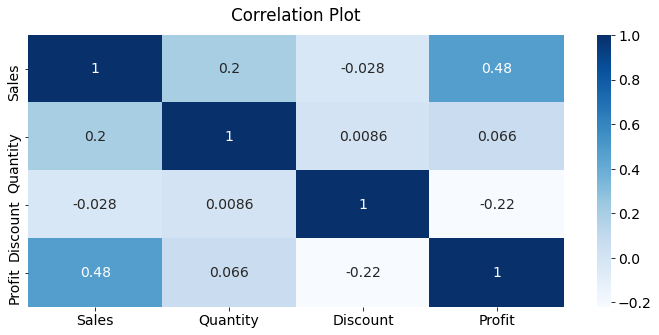

In [9]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues')
plt.title("Correlation Plot", y = 1.03)
plt.show()

Correlation is taken between onlt numerical columns. `Sales, Quality and Profit` seems to be dependant on each other which is right. However, `discount` is not much considerable compared to others.
***

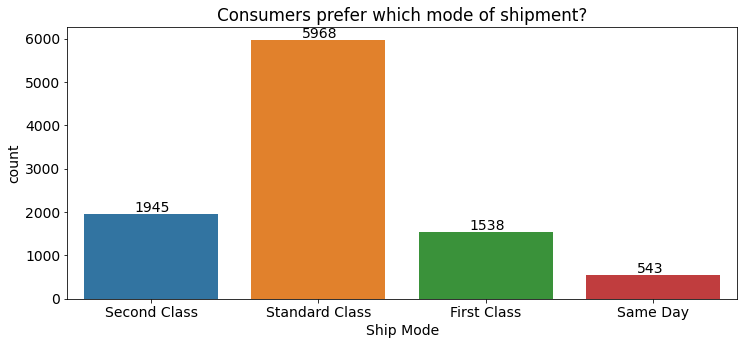

9994

In [10]:
# Consumers prefer which mode of shipment?

ax = sns.countplot(data=data, x="Ship Mode")
plt.title('Consumers prefer which mode of shipment?')

for x in ax.patches:
    ax.annotate('{}'.format(x.get_height()), (x.get_x() + 0.3, x.get_height() + 50))

plt.show()
data.shape[0]

In this graph, we can see number of consumers prefer `standard class` since it does not include extra pay for delivery and it takes usually 3-4 days to deliver the product. Considering same, less people opt for `same day` delivery since it cost more.
***

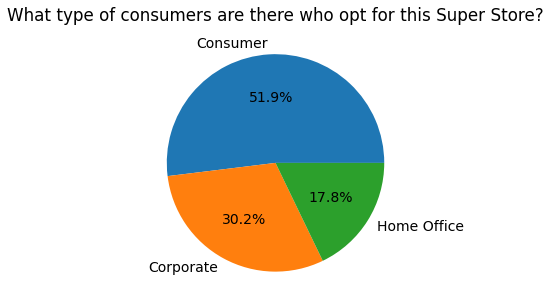

In [11]:
# Let's look at what type of consumers are there who opt for this Super Store?

plt.pie(data.Segment.value_counts().values, labels=data.Segment.value_counts().index, autopct="%1.1f%%")
plt.title('What type of consumers are there who opt for this Super Store?')
plt.show()

It seems that, most customers of this Super Store are `normal consumers (51.9 %)` which is normal. But, at the same time Store deals with corporate world as much as the same. Its business involves `30.2 % Corporate` and `17.8 % Home office` businesses.
***

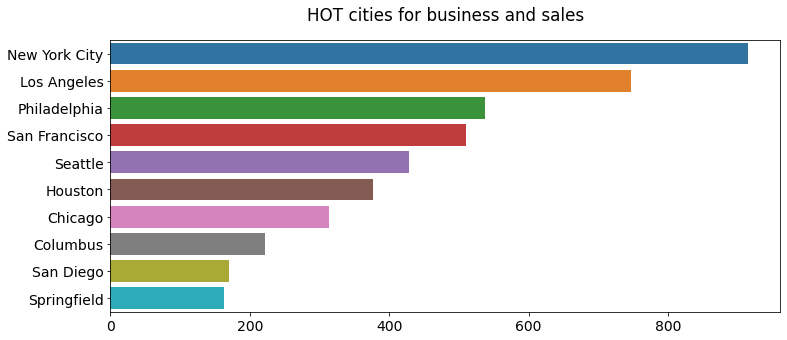

In [12]:
# HOT cities for business and sales
graph = sns.barplot(y = data.City.value_counts().index[:10], x = data.City.value_counts().values[:10])
    
plt.title('HOT cities for business and sales', y = 1.05)
plt.show()

It looks like, store has more order and consumers in `New York` followed by `Los Angeles`, `Philadelphia` and `San Fransisco`. This shows that Store is situated and interested in much popular cities.
***

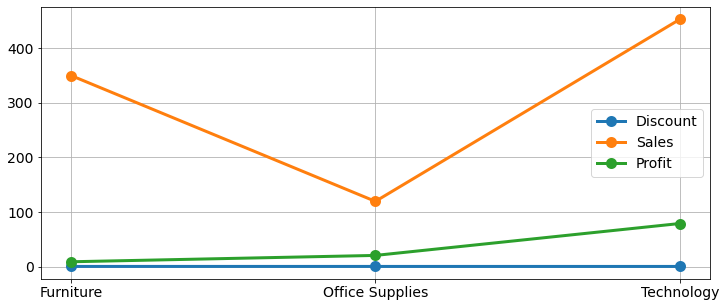

----------------------------------------
Stats by Product categories :
----------------------------------------


,Discount,Sales,Profit
Category,,,
Furniture,0.173923,349.834887,8.699327
Office Supplies,0.157285,119.324101,20.327050
Technology,0.132323,452.709276,78.752002
Total,0.154510,307.289421,35.926126


In [13]:
# Category-wise stats of the store

d = data.groupby("Category").agg({
    'Discount' : 'mean',
    'Sales' : 'mean',
    'Profit' : 'mean',
})

labels = []

for i in range(d.shape[1]):
    plt.plot(d.index, d.iloc[:, i].values, '-o', linewidth=3, mew=5)
    labels.append(d.columns[i])
    
plt.grid()
plt.legend(labels)
plt.show()

print('-' * 40)
print(green("Stats by Product categories :"))
print('-' * 40)

d.loc['Total'] = [d.iloc[:,0].mean(), d.iloc[:,1].mean(), d.iloc[:,2].mean()]
d

From above graph, we can conclude that - Store has more sales of `Furniture and Technology than Office Supplies`. That results in incrase in profits. `Technology stuff gains more profit of all and has most sales` too while `Furniture has more sales but has less profit`. This can be because of `more discount` offerings. Though `office supplies has less sales, it has its good share in profit`. <br><br>
On an average, we can say that - __Store has profit of `36$` per `307$` of sales. And does provide discount of `15%` on an average to its customers.__ <br> <br>
Let's Look into these product categories.
***

In [14]:
# Sales and profits by each sub-category in each category

print('-' * 60)
print(green("Sales and profits by each sub-category in each category :"))
print('-' * 60)
category_sales_data = data.groupby(['Category', 'Sub-Category']).agg({
    'Sales' : 'mean',
    'Profit' : 'mean',
    'Quantity' : 'sum'
})

display(category_sales_data)

------------------------------------------------------------
Sales and profits by each sub-category in each category :
------------------------------------------------------------


Sales      Profit  Quantity
Category        Sub-Category                                   
Furniture       Bookcases      503.859633  -15.230509       868
                Chairs         532.332420   43.095894      2356
                Furnishings     95.825668   13.645918      3563
                Tables         648.794771  -55.565771      1241
Office Supplies Appliances     230.755710   38.922758      1729
                Art             34.068834    8.200737      3000
                Binders        133.560560   19.843574      5974
                Envelopes       64.867724   27.418019       906
                Fasteners       13.936774    4.375660       914
                Labels          34.303055   15.236962      1400
                Paper           57.284092   24.856620      5178
                Storage        264.590553   25.152277      3158
                Supplies       245.650200   -6.258418       647
Technology      Accessories    215.974604   54.111788      2976
                Copiers       2198.941618  817.909190       234
                Machines      1645.553313   29.432669       440
                Phones         371.211534   50.073938      3289

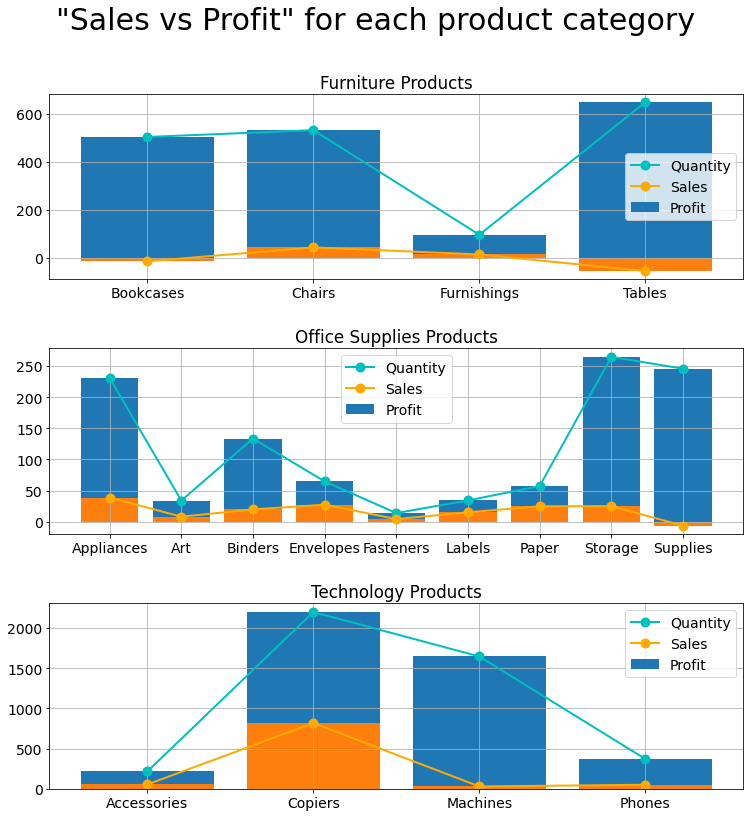

In [15]:
# Plotting Sales and profits by each sub-category in each category

category_sales_data = category_sales_data.reset_index()
main_cat = category_sales_data.Category.unique()
fig, ax = plt.subplots(len(main_cat), figsize=(11, 11), squeeze=True)

for idx, cat in enumerate(main_cat):
    a = category_sales_data[category_sales_data.Category == cat].groupby('Sub-Category').mean()
    
    ax[idx].bar(a.index, a.Sales)
    ax[idx].plot(a.index, a.Sales, 'c-o', linewidth=2, mew=4)
    
    ax[idx].bar(a.index, a.Profit)
    ax[idx].plot(a.index, a.Profit, '#FFAA00', linewidth=2, mew=4, marker='o')
    
    ax[idx].title.set_text(cat + " Products")
    ax[idx].grid()
    ax[idx].legend(['Quantity', 'Sales', 'Profit'])

    
fig.tight_layout(pad = 2)
plt.suptitle('"Sales vs Profit" for each product category', y=1.05, size=30, weight=500)
plt.show()

* __Furniture Products__ : Bookcases, chairs, tables have higher sales than Furnishings.Whereas Chairs make more profit than any of the others. Bookcases is suffering losses dispite of the sales. Tables have the most sales but the profit is in negetive. Is is pretty bad for their business.

* __Office Supplies__ : Storage, supplies, appliacnes has more sales than others where appliances gains more profit than other sub-categories. Supplies has excellent sales but the profit is negative.

* __Technology Products__ : Copiers and machines have more sales but Copiers only has larger profit margin than others. Copiers is the product in this store which has highes profit gain.

Here, we can see that __Copiers (817 \$)__ are the most profit gaining product and __Tables (-55 \$)__ are really bad for the Store's business.
***

In [16]:
# Let's look into statewise performance

state_sales_data = data.groupby('State')[['Sales', 'Profit']].mean()
state_sales_data['Performance'] = state_sales_data['Profit'] / state_sales_data['Sales'] * 100

print('-' * 40)
print(green('Average Sales and profit by state :'))
print('-' * 40)
display(state_sales_data.head())

state_sales_data.reset_index(inplace=True)

----------------------------------------
Average Sales and profit by state :
----------------------------------------


,Sales,Profit,Performance
State,,,
Alabama,319.846557,94.865989,29.659844
Arizona,157.508933,-15.303235,-9.715789
Arkansas,194.635500,66.811452,34.326447
California,228.729451,38.171608,16.688541
Colorado,176.418231,-35.867351,-20.330864


In [17]:
# This is anoher csv file which contains state codes of United States for plotting geo-graph

codes = pd.read_csv('test.txt')
codes.rename(columns={' stusps' : 'stusps'}, inplace=True)

In [18]:
# Creating map of states and state codes

dic = {}
count = 0

for st in codes.stname.values:
    if st in state_sales_data.State.values:
        dic[st] = codes[codes.stname == st].iloc[-1, -1].strip()
        
state_sales_data['Code'] = state_sales_data['State'].apply(lambda x : dic[x])

In [19]:
# Plotting geo-graph of USA states and respective performance stats using plotly library

fig = px.choropleth(
    data_frame=state_sales_data, locations="Code",
    locationmode="USA-states", color='Performance',
    scope="usa", title='Statewise Performance'
)

t1 = fig.add_scattergeo(
    locations = state_sales_data.Code,
    locationmode = 'USA-states',
    text = state_sales_data.State,
    mode = 'text'
)

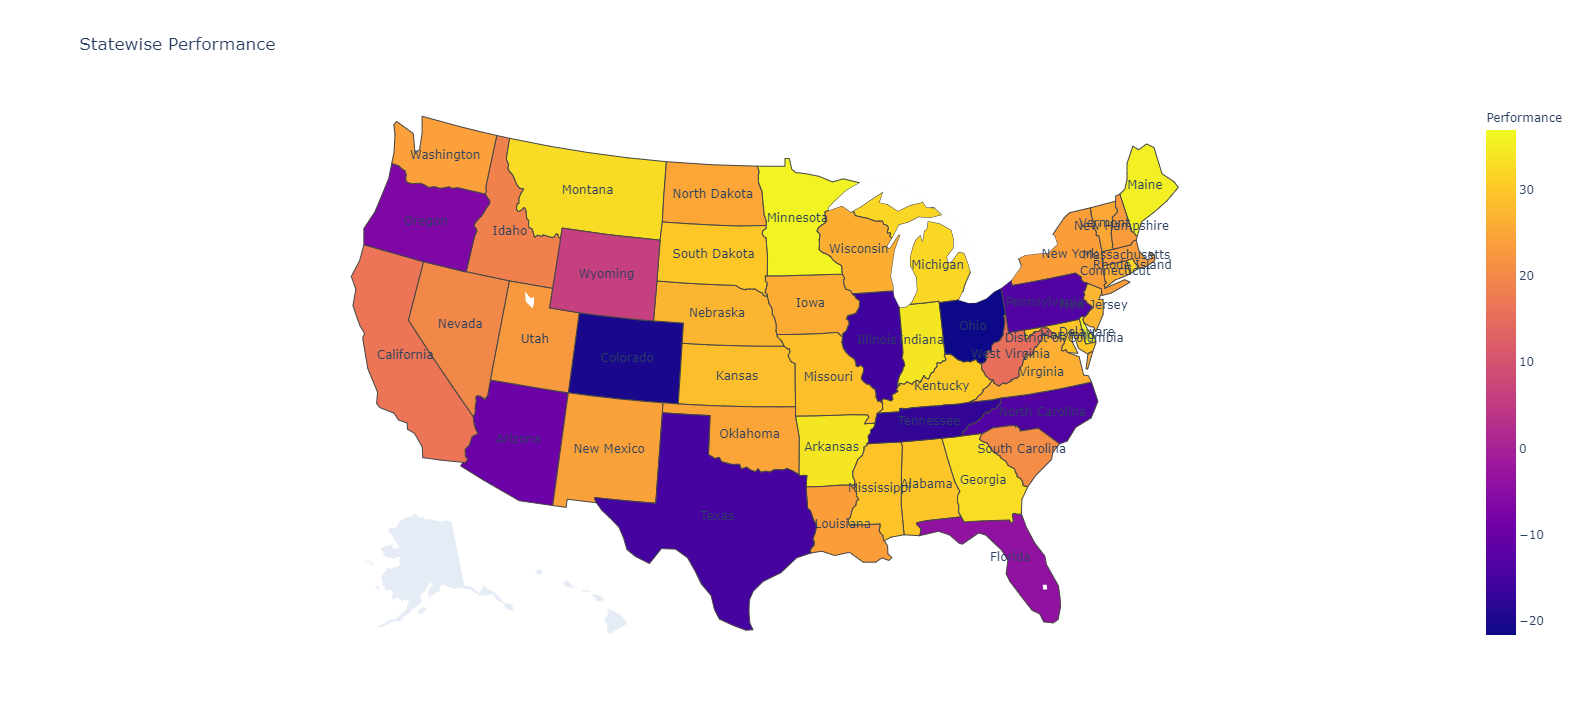

This geo-graph shows `state-wise performance of deals and sales to profit ratio`. Performance is shown as heatmap where yellow represents best whereas dark bluw represents worst performance.

In [20]:
# Looking for max and min sales states

max_sales = state_sales_data[state_sales_data.Sales == state_sales_data.Sales.max()]
min_sales = state_sales_data[state_sales_data.Sales == state_sales_data.Sales.min()]

print("{} {} \t => {:.1f} $".format(green('Max Sales :'), max_sales.State.values[0], max_sales.Sales.values[0]))
print("{} {} => {:.1f} $".format(red('Min Sales :'), min_sales.State.values[0], min_sales.Sales.values[0]))

Max Sales : Wyoming 	 => 1603.1 $
Min Sales : South Dakota => 109.6 $


***
When it comes to `Sales`, `Wyoming` has maximum sales on an average. But `South Dakota` has lowest sales among all the states.
***

In [21]:
# Looking for max and min profit states

max_profit = state_sales_data[state_sales_data.Profit == state_sales_data.Profit.max()]
min_profit = state_sales_data[state_sales_data.Profit == state_sales_data.Profit.min()]

print("{} {} \t => {:.1f} $".format(green('Max Profit :'), max_profit.State.values[0], max_profit.Sales.values[0]))
print("{} {} \t => {:.1f} $".format(red('Min Profit :'), min_profit.State.values[0], min_profit.Sales.values[0]))

Max Profit : Vermont 	 => 811.8 $
Min Profit : Ohio 	 => 166.9 $


***
Again when it comes to `Profit`, `Vermont` gains most profit whereas `Ohio` is pretty bad when it comes to business.
***

In [22]:
max_performance = state_sales_data[state_sales_data.Performance == state_sales_data.Performance.max()]
min_performance = state_sales_data[state_sales_data.Performance == state_sales_data.Performance.min()]

print("{} {} \t => {:.1f} $".format(green('Max Performance :'), max_performance.State.values[0], max_performance.Sales.values[0]))
print("{} {} \t\t\t => {:.1f} $".format(red('Min Performance :'), min_performance.State.values[0], min_performance.Sales.values[0]))

Max Performance : District of Columbia 	 => 286.5 $
Min Performance : Ohio 			 => 166.9 $


***
When it comes, to overall performace `District of Columbia` has better deals i.e. sales to profit ratio. At the same time `Ohio` is worst by performance in deals.
***

# Conclusion and Final Stats :
***
1. Most of the consumers prefer `Standard (60 %)` mode of transportation as it is cheap.
2. Most of the customers are `regular consumers (50+ %)` than corporate and home businesses.
3. Top cities where business is in HOT state - `New York` followed by `Los Angeles`, `Philadelphia` and `San Fransisco`.
4. The store has 3 main typesof products out  of which `Technology products` are sold most and gains more profit. `Office supplies` has less sales and profit. `Funrniture products` has very low profit despite of its sales.
5. `Copiers (817 $)` are the most profit gaining product and `Tables (-55 $)` are really bad for the Store's business.
6. `Wyoming (1603.1 $)` state has most average sales so far whereas `South Dakota (109.6 $)` has the lowest sales.
7. `Vermont (811.8 $)` has better profit gain than other states. `Ohio (166.9 $)` has the lowest.
8. Overall `District of Columbia (286.5 $)` is the best performing state for this super store and `Ohio (166.9 $)` is worst for this store for business till the date.

As we can see from the stats, there are some good sides as well as bad too. Judging from sales and net profit we can say that this Super store is doing pretty well. But there are some areas to improve, like products which are not gaining much profit should undergo different marketing strategy. Store should try to focus on products which are making more profit as it is more important to gain profit which can be used to improve other products and their sales.